### Steps of the algorithm

For each of point to be classified:
* Calculate the (Euclidean) distance between the point and every point in the training set
* Sort distances from lowest to highest and pick $k$ lowest values
* Determine the most frequent class (label) of points from previous step (majority vote). In case of a tie, choose random label (better to use the class with the smaller total distance to classified point)
* Assign to the point class from previous step

In [17]:
import numpy as np

In [18]:
# Define distance function
def distance(X, x):
  '''
  Calculates the Euclidean distance between X and x

  Args:
    X (n, d) array of n points in d dimensional space (training set)
    x (d, ) point to be classified

  Returns
    distances (n, 1) array of distances between i-th point and point to be classified
  '''
  return np.sum((X - x)**2, axis = 1)**(1/2)

In [42]:
def find_k_closest(X, x, k):
  '''
  Finds k closest point to x

    Args:
      X (n, d) array of n points in d dimensional space (training set)
      x (d, ) point to be classified
      k int, number of closest points

      Returns
    (indices, min_distances) , where: indices is the list of indices of k points closest to x and min_distances contains distances of k closest points to x
  '''
  distances = distance(X, x)
  indices = np.argpartition(distances, k)[:k]
  min_distances = distances[indices] # Select only k closest points

  return (indices, min_distances)

In [50]:
def classify(X, y, x, k):
  '''
  Classify x as one on the classes

    Args:
      X (n, d) array of n points in d dimensional space (training set)
      y (n, ) array of labels
      x (d, ) point to be classified
      k int, number of closest points

    Returns:
      label (numeric or categorical) of x
  '''
  (indices, min_distances) = find_k_closest(X, x, k)
  labels = y[indices] # pick appropriate labels from y
  counter = {} # for gathering statistics

  for label in labels:
    counter[label] = counter.get(label, 0) + 1

  sorted_counter = sorted(counter.items(), key = lambda x: x[1], reverse = True) # sort counter
  _, highest_count = sorted_counter[0]

  winner = [] # need to check if there is a tie
  for label, count in counter.items():
    if count == highest_count:
      winner.append((label, count))

  if len(winner) != 1: # There is a tie, so pick randomly
    label = np.random.choice(winner, 1)[0]
  else:
    label = winner[0][0]

  return label


### Testing algorithm for Iris dataset (only two features)

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
data = load_iris(as_frame = True)
df = pd.DataFrame(data=data.data,
                  columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# Select only two features
X = df[['petal length (cm)',	'petal width (cm)']].values
# Select labels
y = data.target.values
# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

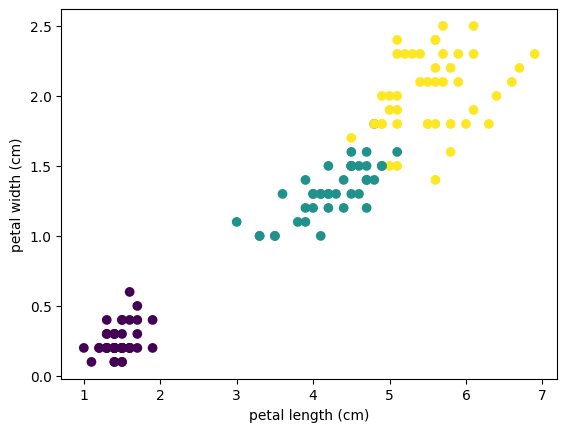

In [28]:
# Plot train dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [52]:
# Printing results for k = 5
for i in range(len(X_test)):
  print(f"Predicted label: {classify(X_train, y_train, X_test[i, :], 5)}, true label: {y_test[i]}")

Predicted label: 0, true label: 0
Predicted label: 1, true label: 1
Predicted label: 1, true label: 1
Predicted label: 2, true label: 2
Predicted label: 2, true label: 2
Predicted label: 1, true label: 1
Predicted label: 1, true label: 1
Predicted label: 2, true label: 2
Predicted label: 1, true label: 1
Predicted label: 2, true label: 2
Predicted label: 2, true label: 2
Predicted label: 1, true label: 1
Predicted label: 2, true label: 1
Predicted label: 0, true label: 0
Predicted label: 1, true label: 1
